<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/finance/%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%EA%B8%B0%EB%B0%98%20%EA%B8%88%EC%9C%B5%20%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/Ch_2_%EC%B4%88%EC%A7%80%EB%8A%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 아타리

* 딥마인드는 강화 학습을 적용하여 인공지능 에이전트라고 부르는 인공지능 알고리즘으로 아타리 2600 게임들을 플레이하는 문제를 학습한 결과를 논문으로 출간

* 이 알고리즘은 CNN 신경망에 Q-Learning 변형을 적용한 것이다

* 고차원 시각 입력만을 이용하고 사람의 지도나 입력없이 학습

* 딥마인드는 7개의 게임을 플레이하도록 학습하는 데 단 하나의 신경망을 사용

* 인간의 지도나 인간이 라벨링한 데이터를 제공하지 않고 오로지 시각 데이터를 특징 데이터로 사용

* 에이전트의 행동과 그 결과의 관계만을 관찰하여 학습

## CartPole

* 수평 막대기를 왼쪽 또는 오른쪽으로 움직여 수평 막대기 위에 놓인 수직 막대의 균형을 잡아야 한다

* 상태 공간
  
  - 수평 막대기 위치
  - 속도
  - 수직 막대기의 각도 및 각속도

* 행동이 이루어지고 수직 막대기가 균형을 잡으면 에이전트는 1이라는 보상치를 얻는다

* 수직 막대기가 쓰러지면 게임은 끝난다

* 에이전트가 200이라는 전체 보상치에 도달하면 성공한 것으로 본다

1. CartPole 환경 객체를 초기화하고 행동 공간과 상태 공간을 조사

2. 무작위 행동을 취한 다음에 그 결과를 캡쳐

3. 종료 변수가 False 값이면 인공지능 에이전트는 다음 라운드로 넘어간다

In [1]:
import gym
import numpy as np
import pandas as pd
np.random.seed(100)

In [2]:
# 환경 객체 초기화
env = gym.make('CartPole-v0')

/usr/local/lib/python3.8/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
# 환경의 무작위 생성 시드값을 고정
env.seed(100)

/usr/local/lib/python3.8/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


[100]

In [5]:
# 행동 공간의 크기
action_size = env.action_space.n
action_size

2

In [6]:
# 무작위 행동을 선택하고 저장
[env.action_space.sample() for _ in range(10)]

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1]

In [7]:
# 상태 공간의 크기
state_size = env.observation_space.shape[0]
state_size

4

In [8]:
# 환경을 초기화하고 상태를 캡쳐
state = env.reset()
state  # [cart position, cart velocity, pole angle, pole angular velocity]

array([ 0.03349816,  0.0096554 , -0.02111368, -0.04570484], dtype=float32)

In [9]:
# 무작위 행동을 취하고 환경을 다음 상태로 넘기기
state, reward, done, _ = env.step(env.action_space.sample())
state, reward, done, _

(array([ 0.03369127, -0.18515752, -0.02202777,  0.24024247], dtype=float32),
 1.0,
 False,
 {})

1. 무작위 행동에 기반하여 게임을 플레이함으로써 충분히 큰 데이터를 생성

2. 데이터의 질을 향상시키기 위해 전체 보상이 110이 넘는 게임에만 데이터를 모은다

3. 신경망을 학습시킬만한 충분한 데이터를 모으기 위해서는 수천 번의 게임을 반복해야 한다

In [10]:
%%time
data = pd.DataFrame()
state = env.reset()
length = []
for run in range(25000):
    done = False
    prev_state = env.reset()
    treward = 1
    results = []
    while not done:
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
        results.append({'s1': prev_state[0], 's2': prev_state[1],
                        's3': prev_state[2], 's4': prev_state[3],
                        'a': action, 'r': reward})
        treward += reward if not done else 0
        prev_state = state

    # 무작위 에이전트의 전체 보상치가 최소 100이상만 선택
    if treward >= 110:

        # 데이터 수집
        data = data.append(pd.DataFrame(results))

        # 전체 보상치 기록
        length.append(treward)

CPU times: user 12 s, sys: 274 ms, total: 12.3 s
Wall time: 12 s


In [11]:
np.array(length).mean()

112.0

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   s1      112 non-null    float32
 1   s2      112 non-null    float32
 2   s3      112 non-null    float32
 3   s4      112 non-null    float32
 4   a       112 non-null    int64  
 5   r       112 non-null    float64
dtypes: float32(4), float64(1), int64(1)
memory usage: 3.6 KB


In [13]:
data.tail()

,s1,s2,s3,s4,a,r
107,0.747127,0.986488,-0.138349,-0.801329,0,1.0
108,0.766857,0.793508,-0.154376,-0.555169,1,1.0
109,0.782727,0.990422,-0.165479,-0.892234,1,1.0
110,0.802536,1.187355,-0.183324,-1.232028,0,1.0
111,0.826283,0.995001,-0.207965,-1.001928,1,1.0


1. 분류 문제를 위한 신경망을 초기화한다

2. 상태 데이터를 특징 데이터로 하고 행동 데이터를 라벨 데이터로 하여 신경망을 학습

3. 주어진 상태에 대해 성공적인 행동을 취한 데이터만 있기 때문에 신경망은 주어진 상태에 대해 취할 해동을 학습할 수 있게 된다

In [14]:
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [15]:
import tensorflow as tf
tf.random.set_seed(100)

In [16]:
from keras.layers import Dense
from keras.models import Sequential

In [17]:
# 은닉층이 하나인 신경망 사용
model = Sequential()

model.add(Dense(64,
                activation='relu',
                input_dim=env.observation_space.shape[0]))

model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [19]:
# 앞서 수집한 데이터에 기반한 모델 학습
%%time
model.fit(data[['s1', 's2', 's3', 's4']], data['a'],
          epochs=25, verbose=False, validation_split=0.2)

CPU times: user 1.67 s, sys: 87.4 ms, total: 1.76 s
Wall time: 2.31 s


In [21]:
# 마지막 단계에서 훈련 단계의 수치 보여주기
res = pd.DataFrame(model.history.history)
res.tail(3)

,loss,acc,val_loss,val_acc
22,0.655517,0.606742,0.663422,0.608696
23,0.654251,0.629214,0.663026,0.608696
24,0.653135,0.629214,0.662683,0.608696


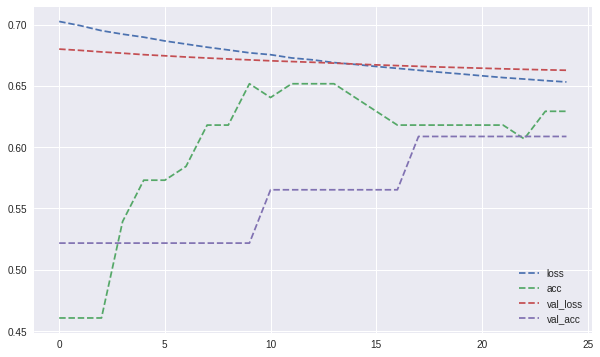

In [22]:
res.plot(figsize=(10, 6), style='--');

* 이렇게 훈련된 신경망, 즉 인공지능 에이전트는 각 상태에서 최선의 행동을 학습한 대로 CartPole 게임을 플레이할 수 있게 된다

In [23]:
def epoch():
    done = False
    state = env.reset()
    treward = 1
    while not done:

        # 주어진 모델과 상태에 따른 모델 행동 선택
        action = np.where(model.predict(np.atleast_2d(state))[0][0] > 0.5, 1, 0)
        
        # 학습된 행동에 기반하여 한 스텝 앞으로 전진
        state, reward, done, _ = env.step(action)
        treward += reward if not done else 0
    return treward

In [24]:
epoch()

1/1 [==============================] - 0s 23ms/step


166.0

In [25]:
# 복수의 게임을 플레이하고 각 게임에 대하여 전체 보상치를 기록
res = np.array([epoch() for _ in range(100)])
res

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 32ms/step


array([119., 121., 101., 121.,  97., 105., 121., 103., 121., 131., 168.,
        95., 118.,  97.,  95., 101., 108.,  91., 112., 123., 100., 119.,
       200., 114., 131., 119., 110., 125., 120., 155., 115., 132.,  93.,
       124., 123., 161., 106., 182.,  97., 106., 114.,  95., 142., 122.,
       102., 176.,  95., 126., 110., 109., 103., 173., 115., 141., 113.,
       118., 106.,  97., 168., 171., 118., 130., 200., 111., 114., 110.,
       126., 200., 122.,  92., 119., 110., 168., 121., 107., 115., 123.,
        94.,  95., 130., 119., 110.,  98., 130., 117., 120., 108., 167.,
       102., 200., 135., 114., 130., 175., 110., 126., 100., 112.,  98.,
       108.])

In [26]:
# 전체 게임의 보상치의 평균값 계산
res.mean()

122.6

# 하드웨어의 강점

**성능**

* GPU와 TPU는 인공지능 알고리즘과 신경망에 적합한 병렬 아키텍처를 하드웨어에 제공

**비용**

* TFLOPS 단위 컴퓨팅 전력 비용이 많이 감소하여 인공지능 관련 예산을 줄이거나 동일한 예산으로 더 많은 컴퓨팅 성능을 제공할 수 있게 되었다

**전력 소모**

* 동일한 인공지능 관련 작업은 더 적은 인력을 필요로 하는 동시에 실행 속도가 더 빨라졌다

# 지능의 형태

**좁은 의미의 인공지능**

* 인공지능 에이전트가 아주 분야에서 인간 전문가의 능력과 기술을 뛰어넘는 것을 의미

**일반적 의미의 인공지능**

* 모든 분야에서 인간 수준의 지능에 도달하고 일부 다른 영역에서는 인간 수준의 지능을 초과할 수 있는 인공지능 에이전트

**초지능**

* 모든 분야애서 인간 수준을 뛰어넘는 지적인 인공지능 에이전트